# **fMRI Analysis**

This notebook analyses distinctions found to be important for ChatGPT's object representation in fMRI data. 

## Imports

In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

import numpy as np

import rsatoolbox
import rsatoolbox.rdm as rsr
from scipy import stats
import src.fMRIAnalysis.data as data
import src.fMRIAnalysis.visualisations as vis
import src.fMRIAnalysis.statistics as rdm_stats
import pandas as pd
import scipy.io


### Import fMRI data

In [3]:
response_data_1 = np.load(r"..\data\betas_csv_testset\betas_csv_testset\sub-01_TestResponsesIT.npy")
response_data_2 = np.load(r"..\data\betas_csv_testset\betas_csv_testset\sub-02_TestResponsesIT.npy")
response_data_3 = np.load(r"..\data\betas_csv_testset\betas_csv_testset\sub-03_TestResponsesIT.npy")
response_data = [response_data_1, response_data_2, response_data_3]

meta_data_1 = data.get_stimulus_data(r"..\data\betas_csv_testset\betas_csv_testset\sub-01_StimulusMetadataTestset.csv")
meta_data_2 = data.get_stimulus_data(r"..\data\betas_csv_testset\betas_csv_testset\sub-02_StimulusMetadataTestset.csv")
meta_data_3 = data.get_stimulus_data(r"..\data\betas_csv_testset\betas_csv_testset\sub-03_StimulusMetadataTestset.csv")
meta_data = [meta_data_1, meta_data_2, meta_data_3]

noise_ceil_1 = scipy.io.loadmat(r"..\data\noise_ceiling_sub01.mat")['ncind']
noise_ceil_2 = scipy.io.loadmat(r"..\data\noise_ceiling_sub02.mat")['ncind']
noise_ceil_3 = scipy.io.loadmat(r"..\data\noise_ceiling_sub03.mat")['ncind']
noise_ceil = [noise_ceil_1, noise_ceil_2, noise_ceil_3]

### Define categories that are supposed to be investigated

In [4]:
category_name_list = [ 'Animacy', 'Indoors', 'Size', 'Man-Made', "Entertainment", 'Transportation',
               'Food', 'Metal', 'Plastic', 'Natural Material', 'Kitchen', 'Living room', 'Bedroom', 'Electricity']

## RDM

In [5]:
# Construct datasets
data_set_2_participants = data.get_dataset_subset(response_data[:2], meta_data[:2], noise_ceil = noise_ceil[:2], cut_off = 0.4)
data_set_3_participants = data.get_dataset_subset(response_data, meta_data, noise_ceil = noise_ceil, cut_off = 0.52)

#normalized datasets for euclidean RDMs
normalized_response_data = []
for r_d in response_data:
    normalized_response_data.append(stats.zscore(r_d))

data_set_2_participants_normalized = data.get_dataset_subset(normalized_response_data[:2], meta_data[:2], noise_ceil = noise_ceil[:2], cut_off = 0.4)
data_set_3_participants_normalized = data.get_dataset_subset(normalized_response_data, meta_data, noise_ceil = noise_ceil, cut_off = 0.52)

# RDMs based on Pearson correlation distance
RDM_corr = rsr.calc_rdm(data_set_2_participants, method='correlation', descriptor='conds')
RDM_corr_3 = rsr.calc_rdm(data_set_3_participants, method='correlation', descriptor='conds')
mean_RDM_corr = rsatoolbox.rdm.rdms.RDMs.mean(RDM_corr)
model_rdms, models = rdm_stats.get_models(RDM_corr, category_name_list)

# RDMs based on Euclidean distance
RDM_eucl = rsr.calc_rdm(data_set_2_participants_normalized, method='euclidean', descriptor='conds')
RDM_eucl_3 = rsr.calc_rdm(data_set_3_participants_normalized, method='euclidean', descriptor='conds')
mean_RDM_eucl = rsatoolbox.rdm.rdms.RDMs.mean(RDM_eucl)
model_rdms_eucl, models_eucl = rdm_stats.get_models(RDM_eucl, category_name_list)


## Correlation Analysis

#### for all models

##### Euclidean

In [5]:
# for 2 participants
res, corr, p= rdm_stats.eval_permutation_pattern(models, RDM_eucl, method = 'spearman')
rdm_stats.get_permutation_results_dataframe(category_name_list, corr, p)

100%|██████████| 1000/1000 [00:39<00:00, 25.50it/s]


Model  Correlation   P-Value
0            Animacy     0.059790  0.119880
1            Indoors     0.030269  0.029970
2               Size     0.036984  0.000999
3           Man-Made     0.010815  0.356643
4      Entertainment    -0.013552  0.585415
5     Transportation    -0.055876  0.836164
6               Food    -0.062730  0.903097
7              Metal     0.022008  0.267732
8            Plastic     0.062330  0.084915
9   Natural Material    -0.031269  0.817183
10           Kitchen    -0.074029  0.963037
11       Living room    -0.052375  0.846154
12           Bedroom     0.080453  0.081918
13       Electricity     0.035644  0.234765

In [6]:
# for 3 participants
res, corr, p= rdm_stats.eval_permutation_pattern(models, RDM_eucl_3, method = 'spearman')
rdm_stats.get_permutation_results_dataframe(category_name_list, corr, p)

100%|██████████| 1000/1000 [01:07<00:00, 14.88it/s]


Model  Correlation   P-Value
0            Animacy     0.046708  0.156843
1            Indoors     0.016004  0.093906
2               Size     0.044443  0.000999
3           Man-Made    -0.011355  0.583417
4      Entertainment    -0.018090  0.622378
5     Transportation    -0.037675  0.757243
6               Food    -0.076807  0.971029
7              Metal     0.049564  0.068931
8            Plastic     0.059649  0.080919
9   Natural Material    -0.050588  0.964036
10           Kitchen    -0.071689  0.969031
11       Living room    -0.020536  0.641359
12           Bedroom     0.106102  0.025974
13       Electricity     0.039382  0.206793

##### Pearson

In [7]:
# for 2 participants
res, corr, p= rdm_stats.eval_permutation_pattern(models, RDM_corr, method = 'spearman')
rdm_stats.get_permutation_results_dataframe(category_name_list, corr, p)

100%|██████████| 1000/1000 [00:39<00:00, 25.52it/s]


Model  Correlation   P-Value
0            Animacy     0.099766  0.021978
1            Indoors     0.037206  0.007992
2               Size     0.051089  0.000999
3           Man-Made     0.095782  0.011988
4      Entertainment    -0.006079  0.509491
5     Transportation    -0.011188  0.537463
6               Food     0.028599  0.259740
7              Metal    -0.033296  0.810190
8            Plastic     0.011047  0.363636
9   Natural Material     0.045564  0.101898
10           Kitchen     0.014947  0.353646
11       Living room    -0.002049  0.487512
12           Bedroom     0.002420  0.445554
13       Electricity    -0.004611  0.514486

In [8]:
# for 3 participants
res, corr, p= rdm_stats.eval_permutation_pattern(models, RDM_corr_3, method = 'spearman')
rdm_stats.get_permutation_results_dataframe(category_name_list, corr, p)

100%|██████████| 1000/1000 [00:33<00:00, 29.76it/s]


Model  Correlation   P-Value
0            Animacy     0.134253  0.003996
1            Indoors     0.032173  0.013986
2               Size     0.052697  0.000999
3           Man-Made     0.083731  0.014985
4      Entertainment    -0.040570  0.834166
5     Transportation     0.050478  0.148851
6               Food    -0.030333  0.770230
7              Metal    -0.011496  0.636364
8            Plastic     0.007575  0.382617
9   Natural Material     0.034208  0.103896
10           Kitchen    -0.034267  0.829171
11       Living room    -0.016570  0.619381
12           Bedroom     0.029668  0.227772
13       Electricity     0.006089  0.404595

#### For animal models

##### Euclidean

In [9]:
animate_data_rdms, anim_models, anim_category_name_list = rdm_stats.get_subset_animacy(RDM_eucl)

In [10]:
res, corr, p = rdm_stats.eval_permutation_pattern(anim_models, animate_data_rdms, method = 'spearman')
rdm_stats.get_permutation_results_dataframe(anim_category_name_list, corr, p)

100%|██████████| 1000/1000 [00:03<00:00, 280.06it/s]


Model  Correlation   P-Value
0       Habitat     0.242282  0.032967
1     Carnivore     0.067963  0.259740
2     Herbivore    -0.002278  0.472527
3      Omnivore     0.063918  0.499500
4        Mammal     0.179902  0.035964
5       Reptile     0.055677  0.324675
6  Invertebrate     0.022274  0.411588

##### Pearson

In [11]:
animate_data_rdms, anim_models, anim_category_name_list = rdm_stats.get_subset_animacy(RDM_corr)

In [12]:
res, corr, p = rdm_stats.eval_permutation_pattern(anim_models, animate_data_rdms, method = 'spearman')
rdm_stats.get_permutation_results_dataframe(anim_category_name_list, corr, p)

100%|██████████| 1000/1000 [00:03<00:00, 300.18it/s]


Model  Correlation   P-Value
0       Habitat    -0.064374  0.671329
1     Carnivore     0.146777  0.093906
2     Herbivore     0.005696  0.433566
3      Omnivore     0.035510  0.219780
4        Mammal     0.359233  0.001998
5       Reptile     0.056310  0.228771
6  Invertebrate     0.145064  0.106893

### Correlations within / across category boundaries

In [13]:
rdm_stats.get_data_frame_within_across(RDM_corr, RDM_eucl, category_name_list)

Distinction Within-Yes (Correlation) Within-No (Correlation)  \
0            Animacy                 0.651356                0.702018   
1            Indoors                 0.702888                0.697304   
2               Size                 0.702684                0.695603   
3           Man-Made                 0.697114                0.701664   
4      Entertainment                 0.709298                0.708836   
5     Transportation                 0.629772                0.712876   
6               Food                 0.714671                 0.70287   
7              Metal                 0.682774                0.717821   
8            Plastic                 0.695282                0.713455   
9   Natural Material                 0.729659                0.697891   
10           Kitchen                 0.709063                0.704619   
11       Living room                 0.707091                0.706737   
12           Bedroom                 0.719019                0.707077   
13       Electricity                 0.683107                0.711316   

   Across (Correlation) Within-Yes (Euclidean) Within-No (Euclidean)  \
0              0.705827               0.266012              0.290083   
1              0.706656               0.300275              0.275466   
2              0.706801               0.285636              0.292757   
3              0.701271               0.261036              0.298114   
4              0.705827               0.275229              0.292139   
5              0.716649               0.260628              0.293474   
6              0.702032               0.238369              0.298792   
7              0.708991               0.327064              0.276606   
8              0.698831               0.344246              0.278247   
9              0.710551               0.254859              0.305292   
10                0.698               0.229146               0.30357   
11             0.719898               0.219433              0.294594   
12             0.698723               0.375899              0.279465   
13             0.712671               0.387076              0.282432   

   Across (Euclidean)  
0            0.294369  
1            0.290533  
2             0.29011  
3            0.292784  
4            0.294369  
5            0.286688  
6            0.297836  
7            0.290985  
8            0.294117  
9            0.291419  
10           0.291916  
11           0.299778  
12           0.297274  
13           0.295898

### Dependency of correlation on voxel selection

c:\Users\rogal\miniconda3\envs\Playing20QWithNature\Lib\site-packages\rsatoolbox\rdm\calc.py:209: RuntimeWarning: invalid value encountered in divide
  ma /= np.sqrt(np.einsum('ij,ij->i', ma, ma))[:, None]
c:\Users\rogal\miniconda3\envs\Playing20QWithNature\Lib\site-packages\rsatoolbox\rdm\calc.py:208: RuntimeWarning: Mean of empty slice.
  ma = ma - ma.mean(axis=1, keepdims=True)
c:\Users\rogal\miniconda3\envs\Playing20QWithNature\Lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
c:\Users\rogal\miniconda3\envs\Playing20QWithNature\Lib\site-packages\rsatoolbox\rdm\calc.py:208: RuntimeWarning: Mean of empty slice.
  ma = ma - ma.mean(axis=1, keepdims=True)
c:\Users\rogal\miniconda3\envs\Playing20QWithNature\Lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
c:\Users\rogal\miniconda3\envs\Playing20QWithNature\Lib\site-packages\rsatoolbox\rdm\calc.

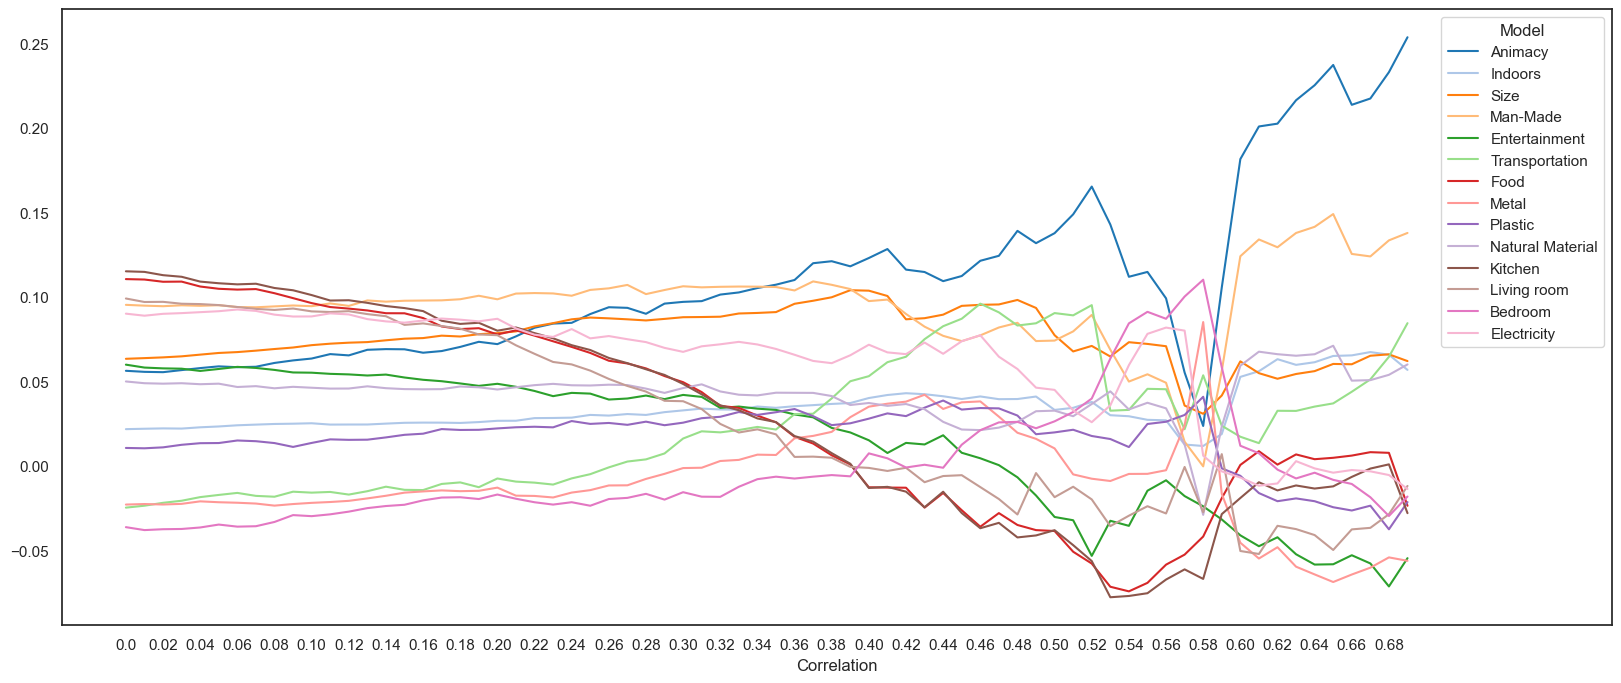

In [16]:
rdm_stats.plot_correlation_noise_ceiling_mean(response_data, meta_data, noise_ceil, category_name_list, 3, 'correlation')

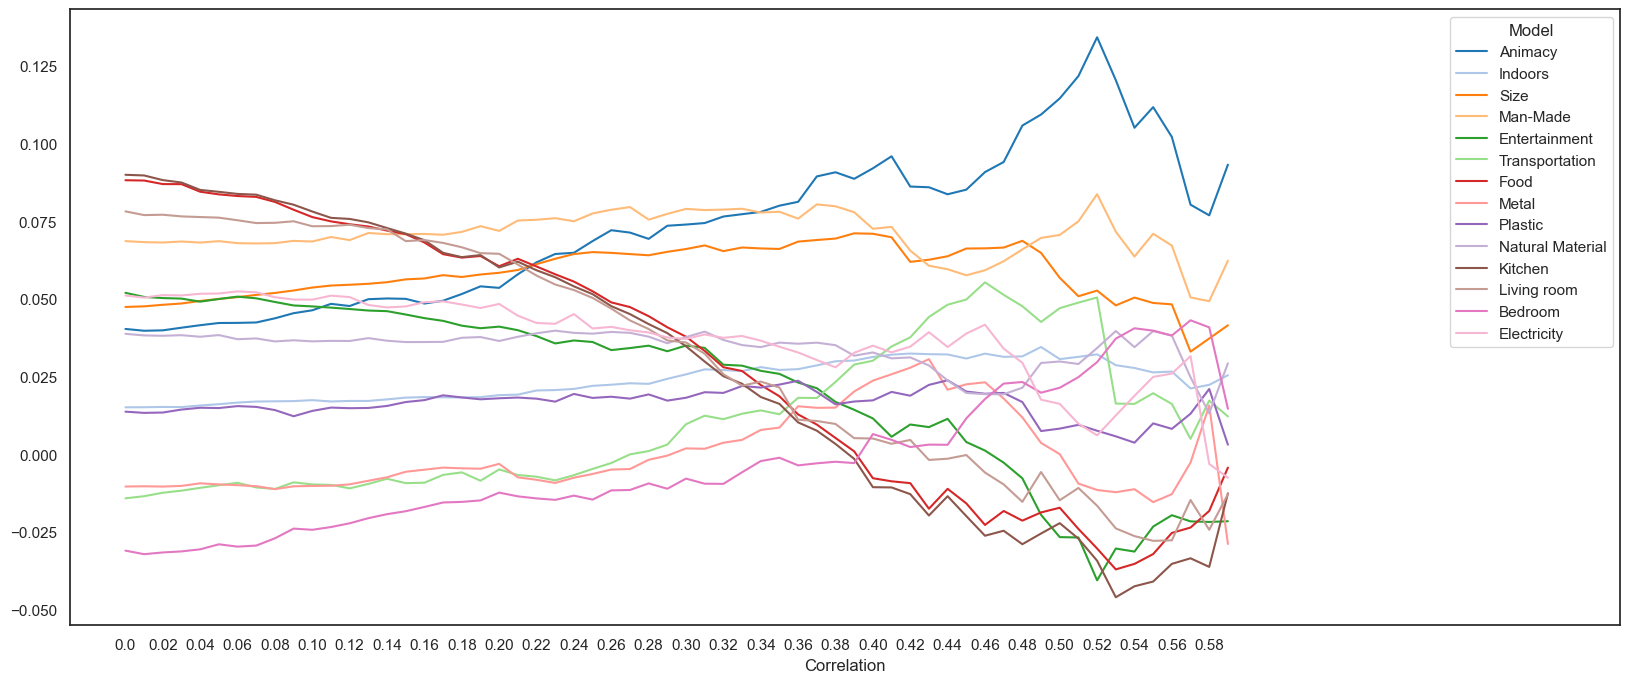

In [62]:
rdm_stats.plot_correlation_noise_ceiling(response_data, meta_data, noise_ceil, category_name_list, 3, 'correlation')

#### Plotting correlation to noise ceiling cutoff with horizontal bars for significance

##### with averaged correlations

100%|██████████| 1000/1000 [00:17<00:00, 58.44it/s]


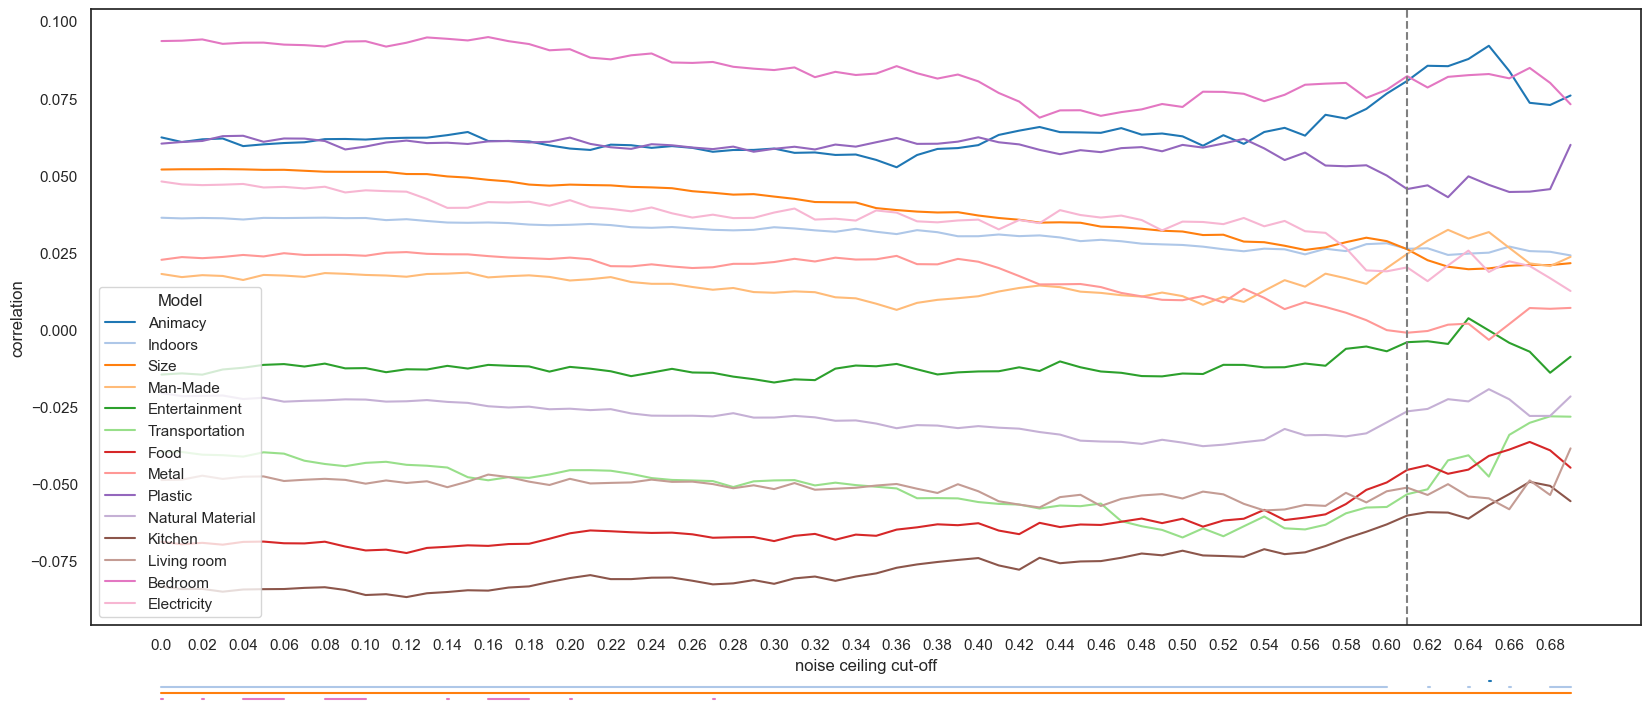

In [17]:
rdm_stats.plot_corr_and_p(normalized_response_data, meta_data, noise_ceil, category_name_list, 2, 'euclidean')

100%|██████████| 1000/1000 [00:17<00:00, 56.89it/s]


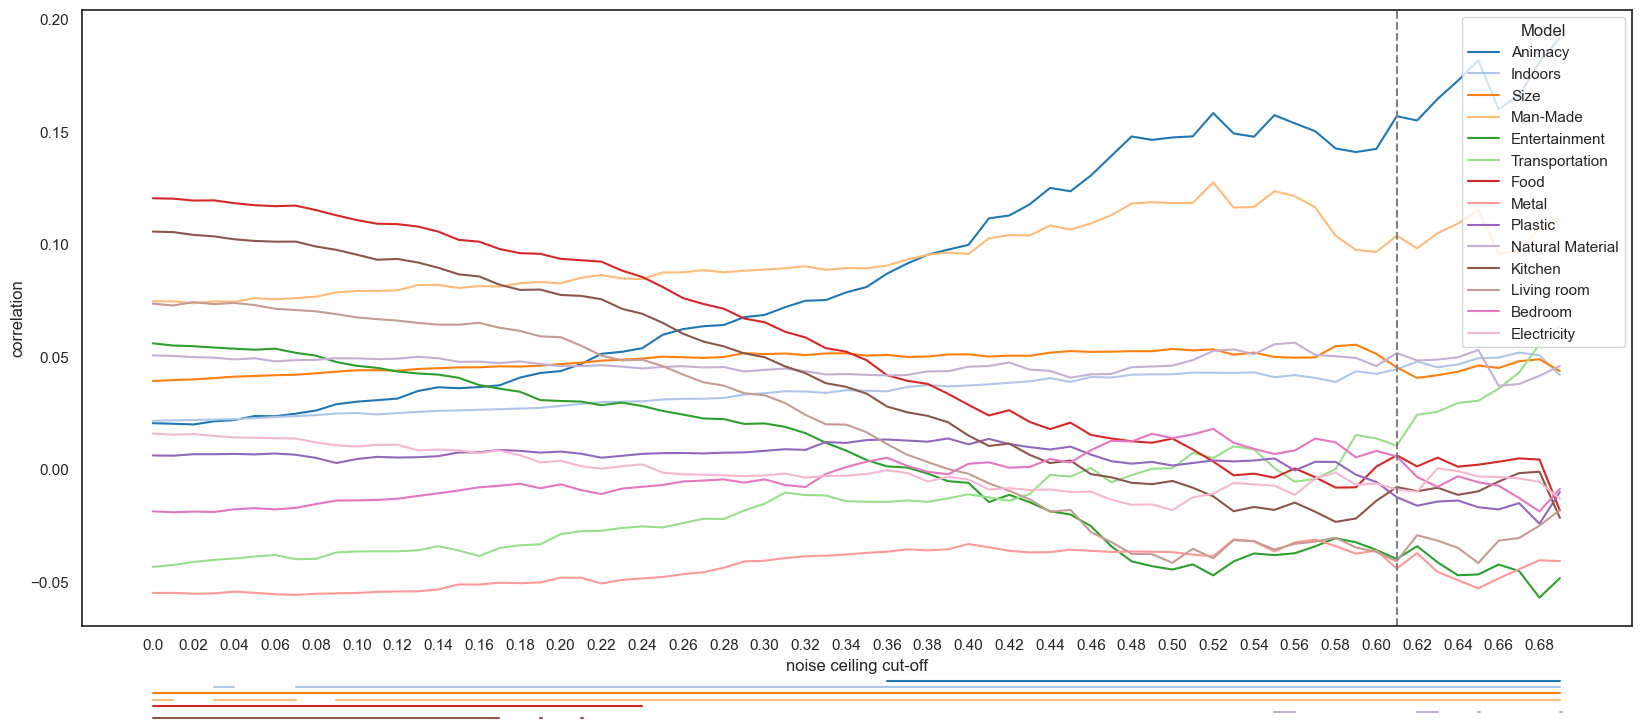

In [19]:
rdm_stats.plot_corr_and_p(response_data, meta_data, noise_ceil, category_name_list, 2, 'correlation')

##### plots as displayed in the thesis

Due to a copy paste error in earlier used code, for pearson distance the correlations are based on correlations with the mean_RDM and the p-value is based on the mean pvalue of participant RDMs, for euclidean distance the correlation is based on non-normalized response patterns while the p-value is based on normalized. Those mistakes were only found shortly after handing in. They were dissolved in the plots as displayed above but are displayed here. 

100%|██████████| 1000/1000 [00:17<00:00, 58.12it/s]


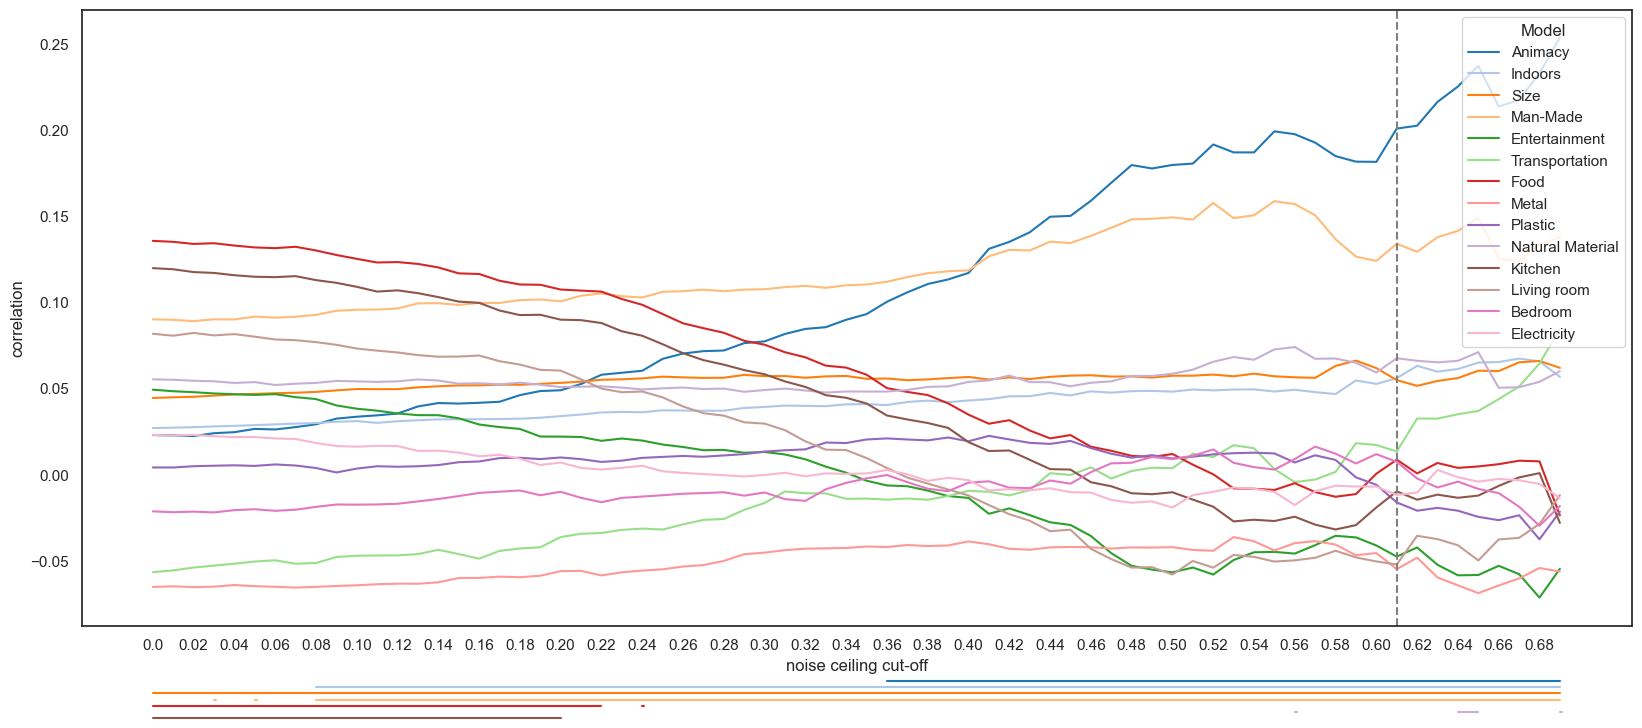

In [20]:
rdm_stats.plot_corr_and_p_thesis_pearson(response_data, meta_data, noise_ceil, category_name_list, 2, 'correlation')

100%|██████████| 1000/1000 [00:17<00:00, 57.04it/s]


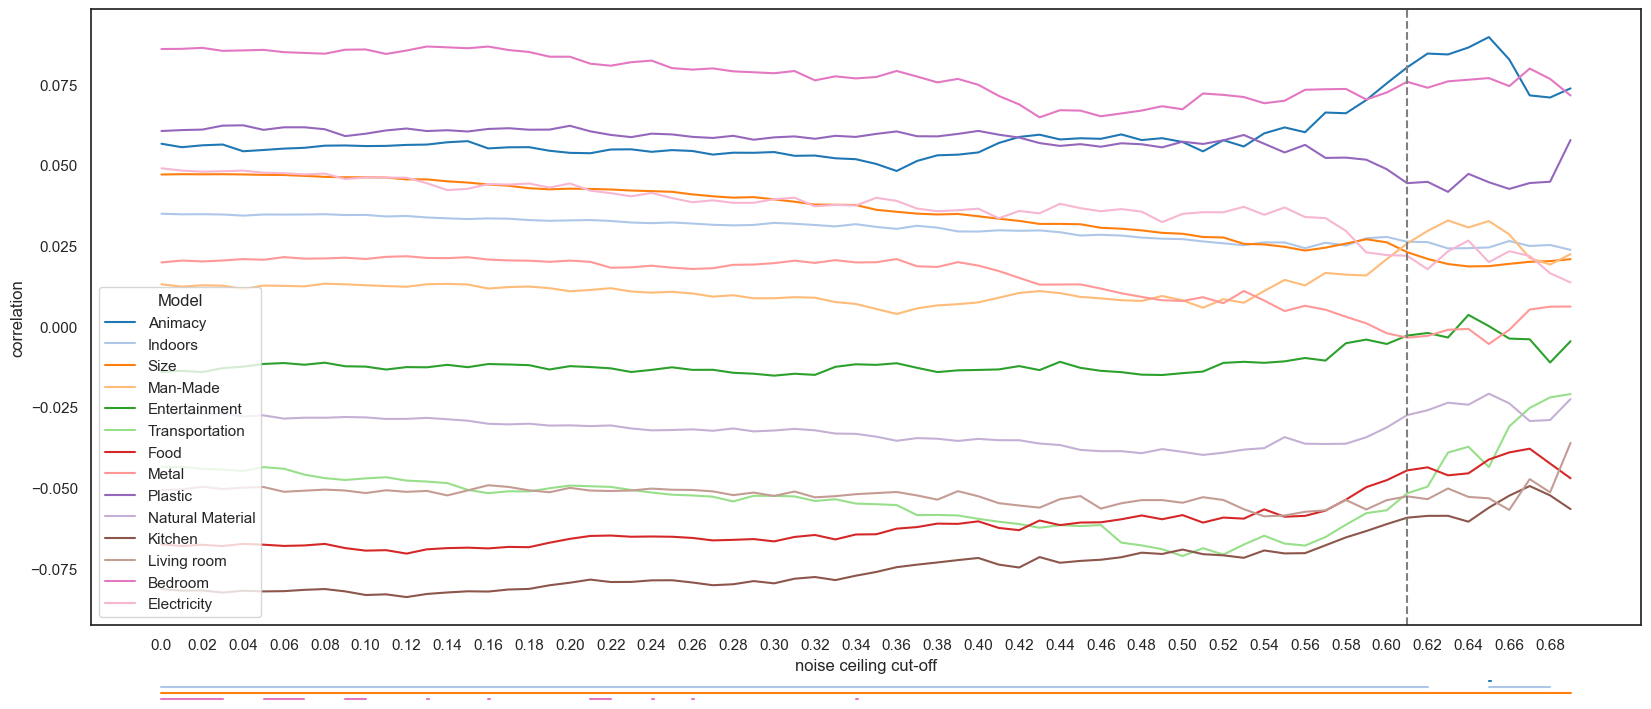

In [21]:
rdm_stats.plot_corr_and_p_thesis_euclidean(normalized_response_data, response_data, meta_data, noise_ceil, category_name_list, 2, 'euclidean')

#### Plotting P-value to noise ceiling cutoff

100%|██████████| 1000/1000 [00:17<00:00, 58.35it/s]


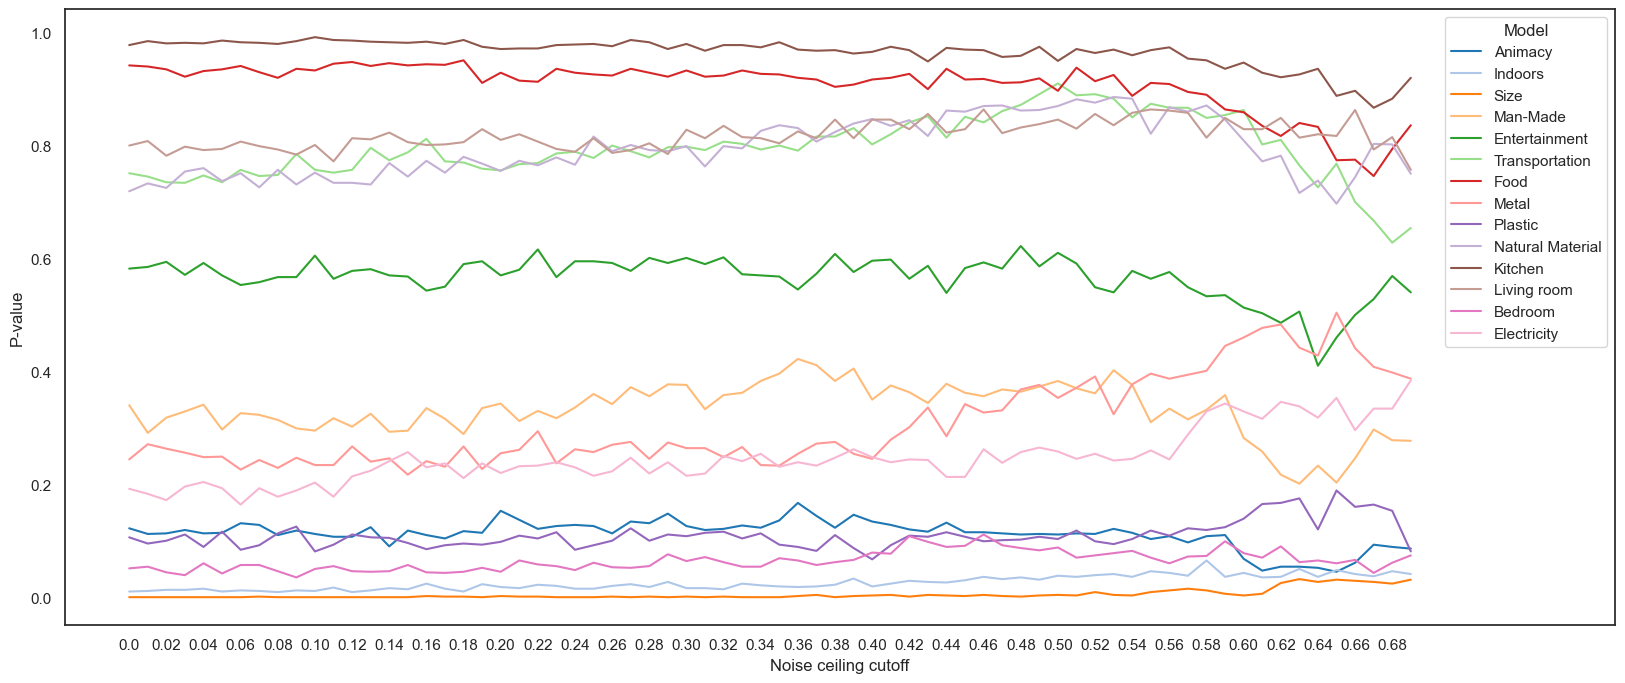

In [12]:
rdm_stats.plot_p_to_nc(normalized_response_data, meta_data, noise_ceil, category_name_list, 2, 'euclidean')

100%|██████████| 1000/1000 [00:19<00:00, 51.77it/s]


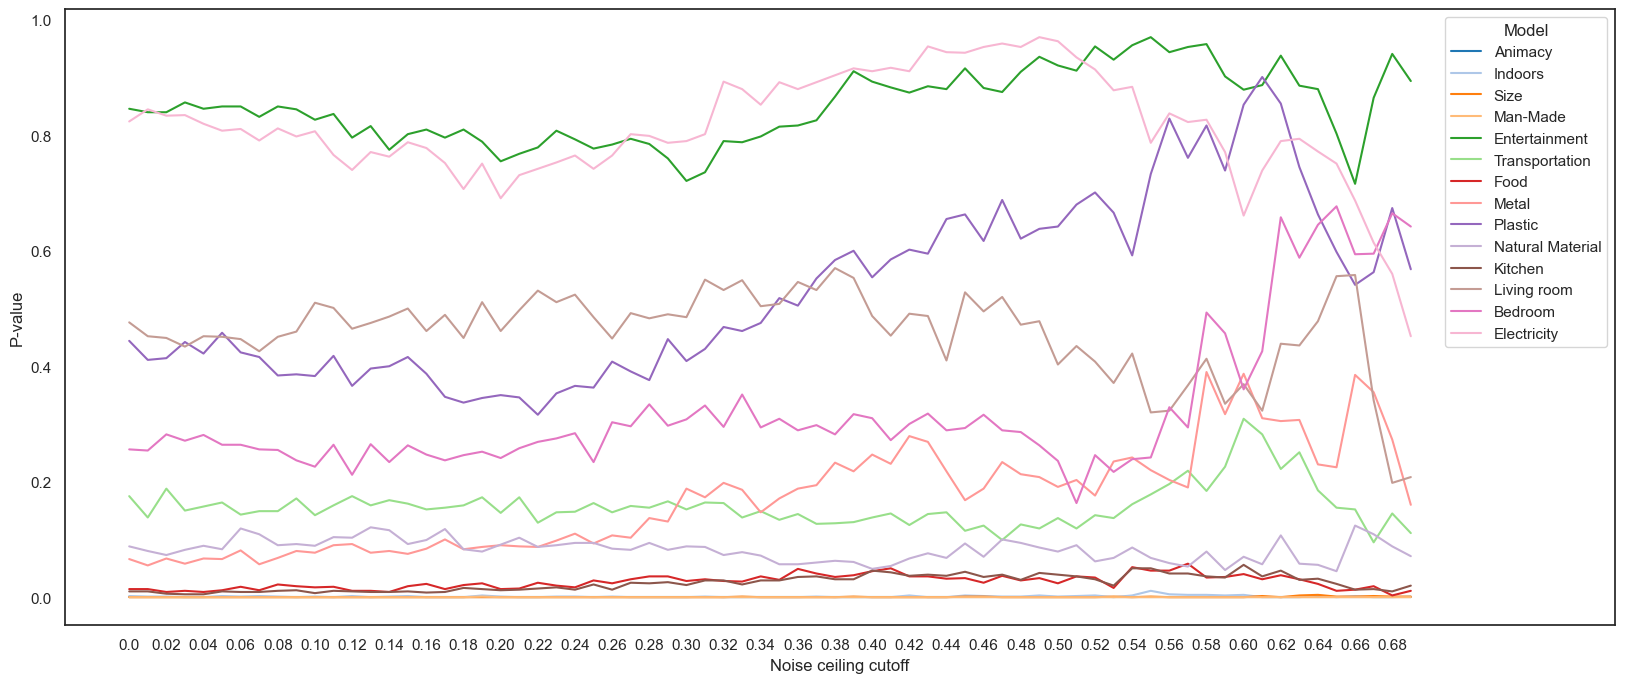

In [13]:
rdm_stats.plot_p_to_nc(normalized_response_data, meta_data, noise_ceil, category_name_list, 2, 'correlation')

## General Linear Model

In [24]:
df_normalized_rdms = rdm_stats.get_normalized_models(model_rdms, category_name_list)

In [25]:
res_nnls = scipy.optimize.nnls(df_normalized_rdms, RDM_corr.get_vectors()[0])
df_res = pd.DataFrame(columns = ['', 'coef'])
df_res[''] = df_normalized_rdms.columns
df_res['coef'] = res_nnls[0]
print(df_res)

                          coef
0              const  0.887829
1            Animacy  0.074689
2            Indoors  0.009572
3               Size  0.020254
4           Man-Made  0.000000
5      Entertainment  0.001972
6     Transportation  0.032895
7               Food  0.000000
8              Metal  0.000000
9            Plastic  0.000000
10  Natural Material  0.000259
11           Kitchen  0.007807
12       Living room  0.020233
13           Bedroom  0.000000
14       Electricity  0.000000


In [26]:
av_R2_euclidean =rdm_stats.get_overall_explained_variance(model_rdms, RDM_corr, category_name_list)
av_R2_pearson =rdm_stats.get_overall_explained_variance(model_rdms, RDM_eucl, category_name_list)

print("NNLS R2 score for Pearson correlation RDM: ", av_R2_pearson )
print("NNLS R2 score for Euclidean RDM: ", av_R2_euclidean )

NNLS R2 score for Pearson correlation RDM:  0.024302229649536655
NNLS R2 score for Euclidean RDM:  0.36661979492476177


In [28]:
rdm_stats.get_unique_explained_variance(RDM_corr, category_name_list)

100%|██████████| 1000/1000 [08:09<00:00,  2.04it/s]


Distinction  Explained Variance   P-value
0            Animacy        1.723447e-02  0.000999
1            Indoors        2.235664e-04  0.065934
2               Size        1.198222e-03  0.004995
3           Man-Made        1.523492e-04  0.229770
4      Entertainment        9.516217e-06  0.579421
5     Transportation        4.097316e-03  0.102897
6               Food        0.000000e+00  0.994006
7              Metal        0.000000e+00  0.995005
8            Plastic        4.711385e-04  0.331668
9   Natural Material        1.536822e-07  0.583417
10           Kitchen        4.043403e-05  0.377622
11       Living room        1.007313e-03  0.256743
12           Bedroom        2.513474e-03  0.104895
13       Electricity        0.000000e+00  1.000000

## Visualisations

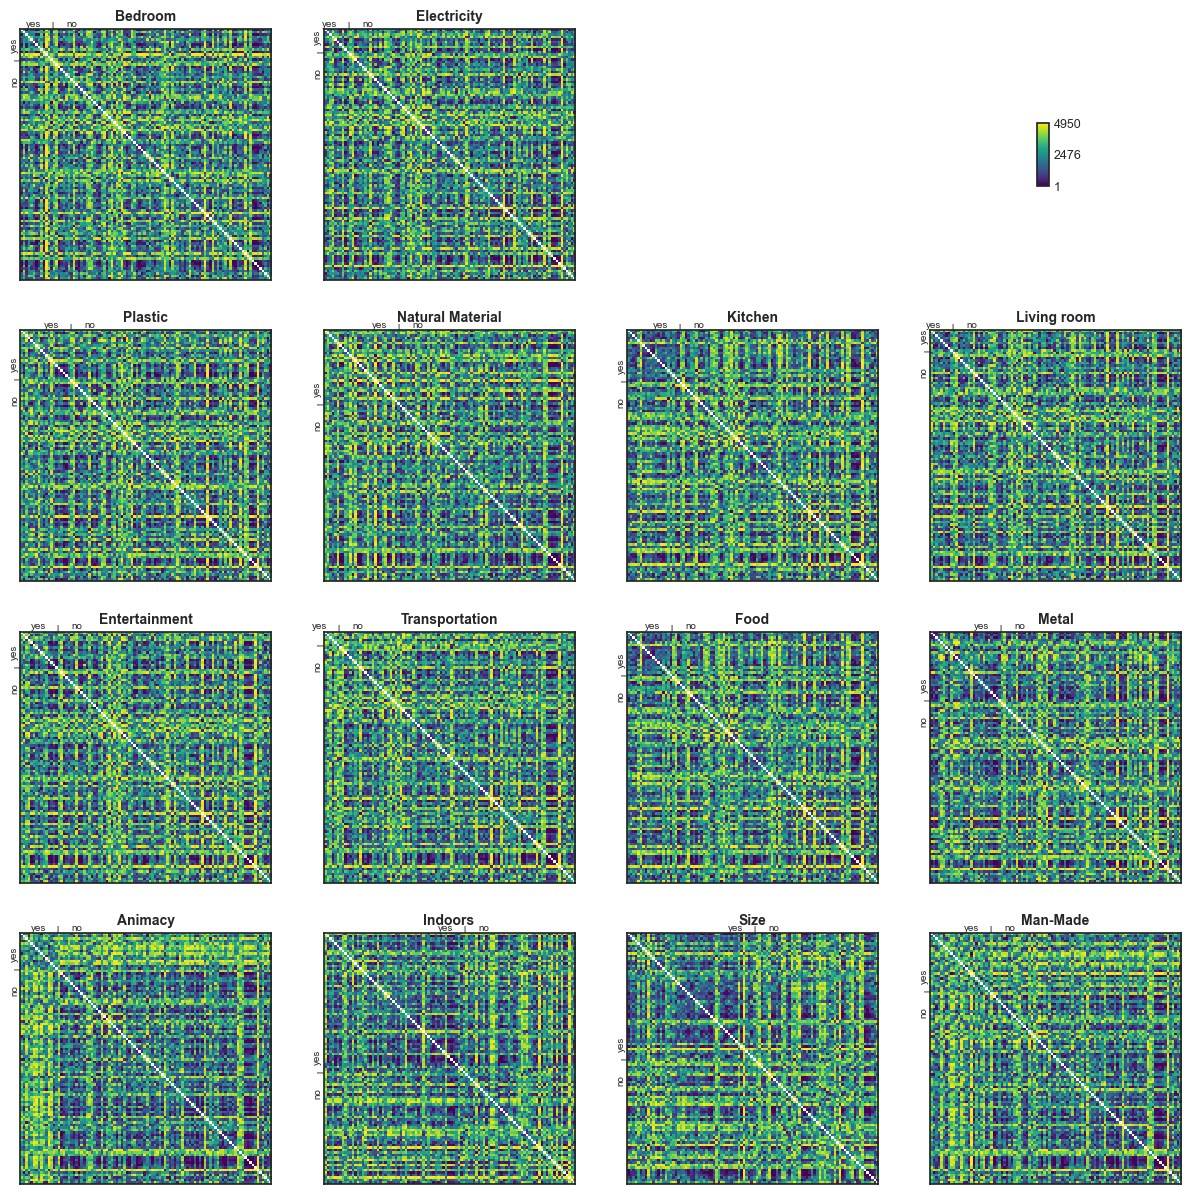

In [29]:
vis.plot_all_model_rdms(mean_RDM_corr, category_name_list)

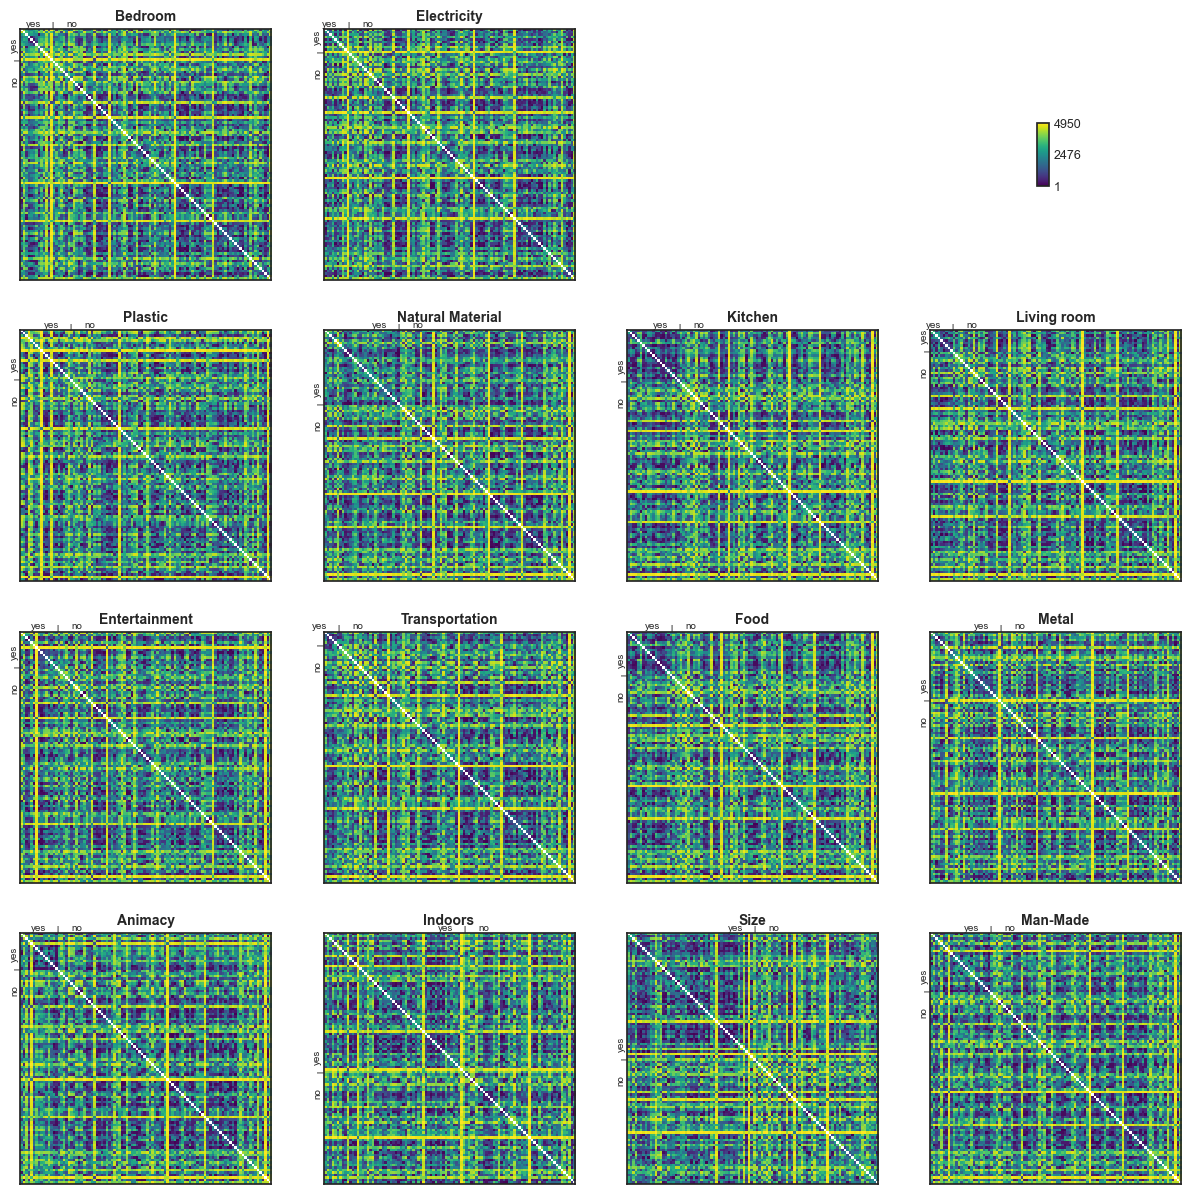

In [30]:
vis.plot_all_model_rdms(mean_RDM_eucl, category_name_list)

## MDS

### Based on Pearson correlation distance RDM

c:\Users\rogal\miniconda3\envs\Playing20QWithNature\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


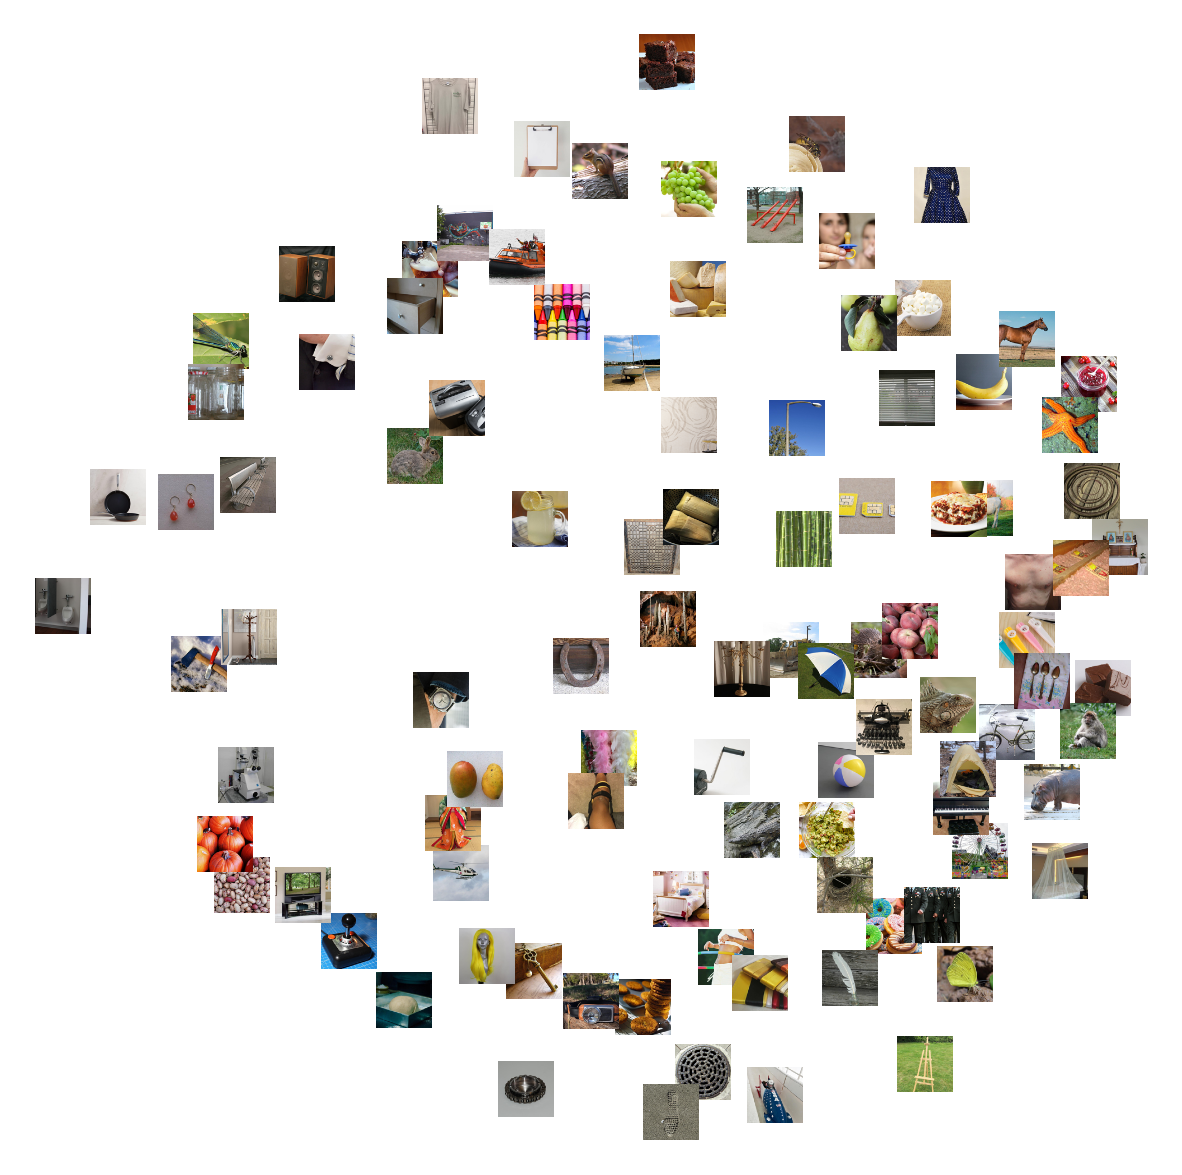

In [31]:
vis.plot_mds_images(mean_RDM_corr, icon_size = 0.4)

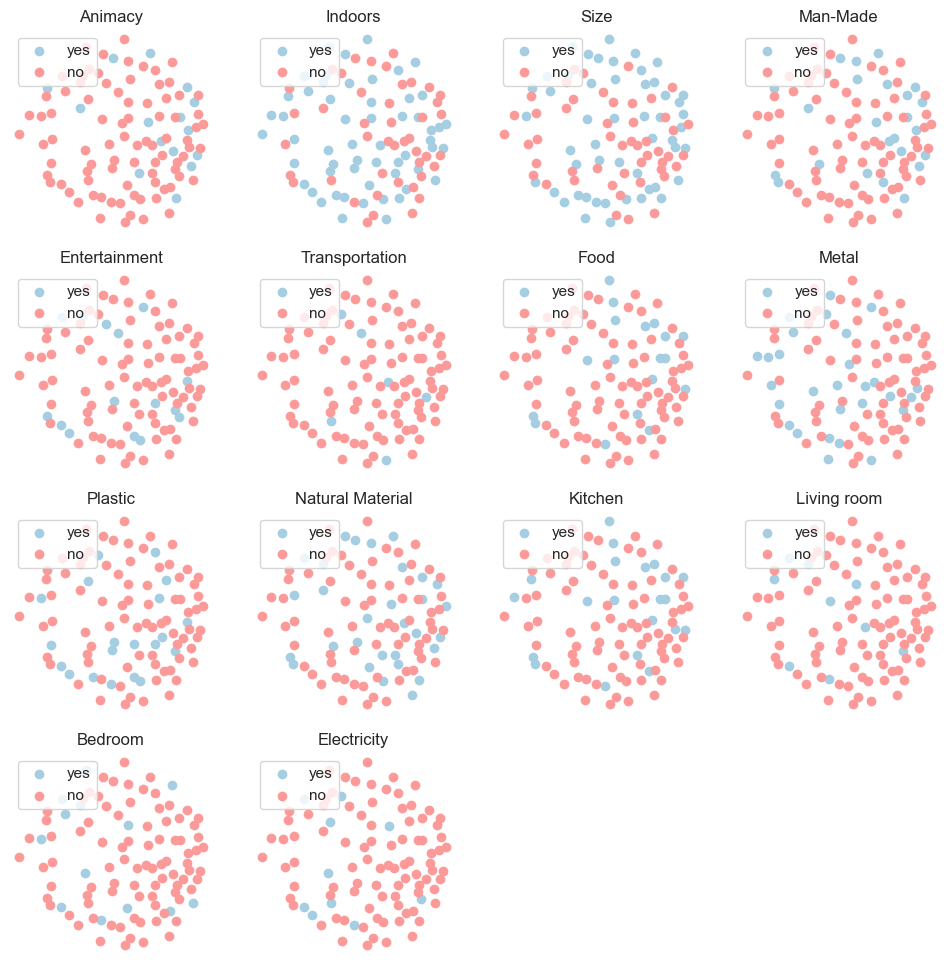

In [32]:
vis.plot_mds_distinctions(mean_RDM_corr, category_name_list)

### Based on Euclidean distance RDM

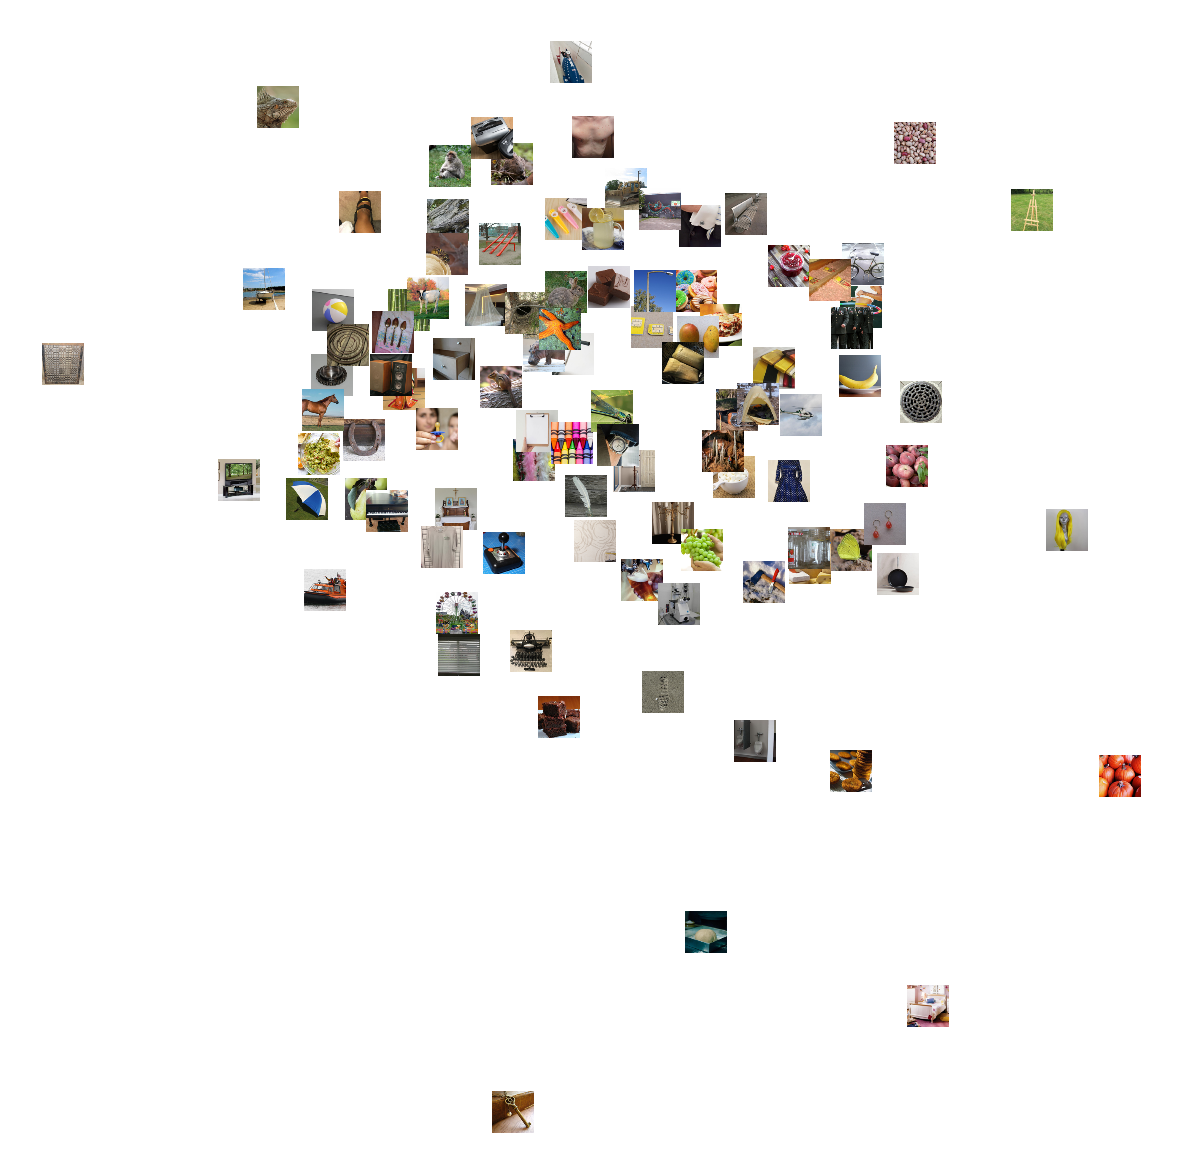

In [33]:
vis.plot_mds_images(mean_RDM_eucl, icon_size = 0.3)

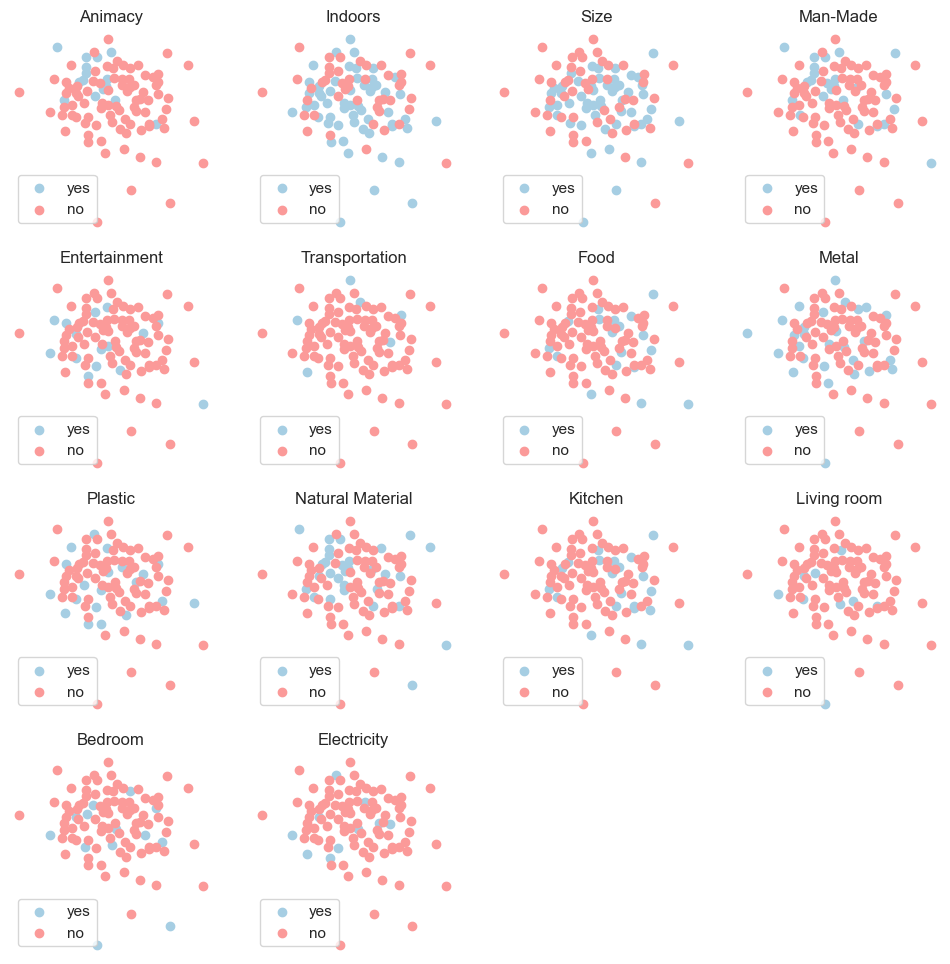

In [34]:
vis.plot_mds_distinctions(mean_RDM_eucl, category_name_list)

## Image and Distinction Assignment Overview

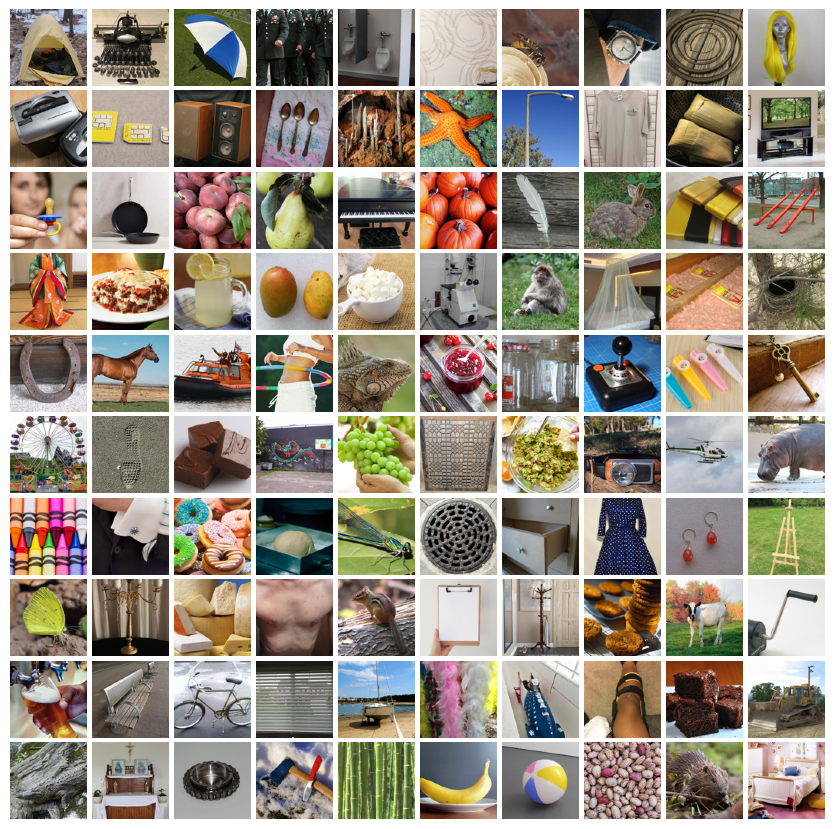

In [60]:
vis.get_stimuli_images(mean_RDM_corr)

In [36]:
data.get_assignment_dataframe(list(set(meta_data_1['stimulus'])), category_name_list)

Distinction  \
0            Animacy   
1            Indoors   
2               Size   
3           Man-Made   
4      Entertainment   
5     Transportation   
6               Food   
7              Metal   
8            Plastic   
9   Natural Material   
10           Kitchen   
11       Living room   
12           Bedroom   
13       Electricity   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          Yes  \
0                                                                                                                                                                                                                                                                                                                                                       [wasp, dragonfly, monkey, butterfly, beaver, rabbit, bamboo, chipmunk, hippopotamus, iguana, alligator, starfish, cow, chest1, horse]   
1   [mango, crank, pacifier, dress, typewriter, lemonade, horseshoe, television, brownie, banana, bed, ribbon, piano, bobsled, spoon, mosquitonet, speaker, donut, fudge, key, beer, cookie, pan, kazoo, simcard, dough, jar, candelabra, ashtray, tamale, joystick, drawer, beachball, coatrack, earring, guacamole, cheese, quill, lasagna, mousetrap, wallpaper, crayon, boa, altar, shredder, kimono, brace, wig, urinal, microscope, blind, cufflink, clipboard, watch, chest1, t-shirt]   
2                                                 [headlamp, mango, crank, pacifier, wasp, dress, dragonfly, lemonade, horseshoe, brownie, banana, ribbon, whip, jam, bean, spoon, mosquitonet, pear, speaker, donut, fudge, key, footprint, beer, cookie, butterfly, kazoo, simcard, dough, ashtray, tamale, uniform, marshmallow, joystick, earring, guacamole, cheese, quill, lasagna, mousetrap, crayon, chipmunk, peach, boa, wig, cufflink, grape, clipboard, starfish, watch, t-shirt]   
3                                                                                                                                                                                                                                                                                       [mango, wasp, dragonfly, banana, bean, pear, monkey, butterfly, beaver, nest, rabbit, cheese, bamboo, chipmunk, peach, hippopotamus, pumpkin, iguana, grape, alligator, starfish, cow, chest1, horse]   
4                                                                                                                                                                                                                                                                                                                                                           [boat, hulahoop, television, ribbon, piano, speaker, beer, seesaw, kazoo, ferriswheel, joystick, beachball, crayon, boa, pumpkin]   
5                                                                                                                                                                                                                                                                                                                                                                                                                                    [helicopter, boat, hovercraft, bobsled, bike, bulldozer]   
6                                                                                                                                                                                                                                                                                        

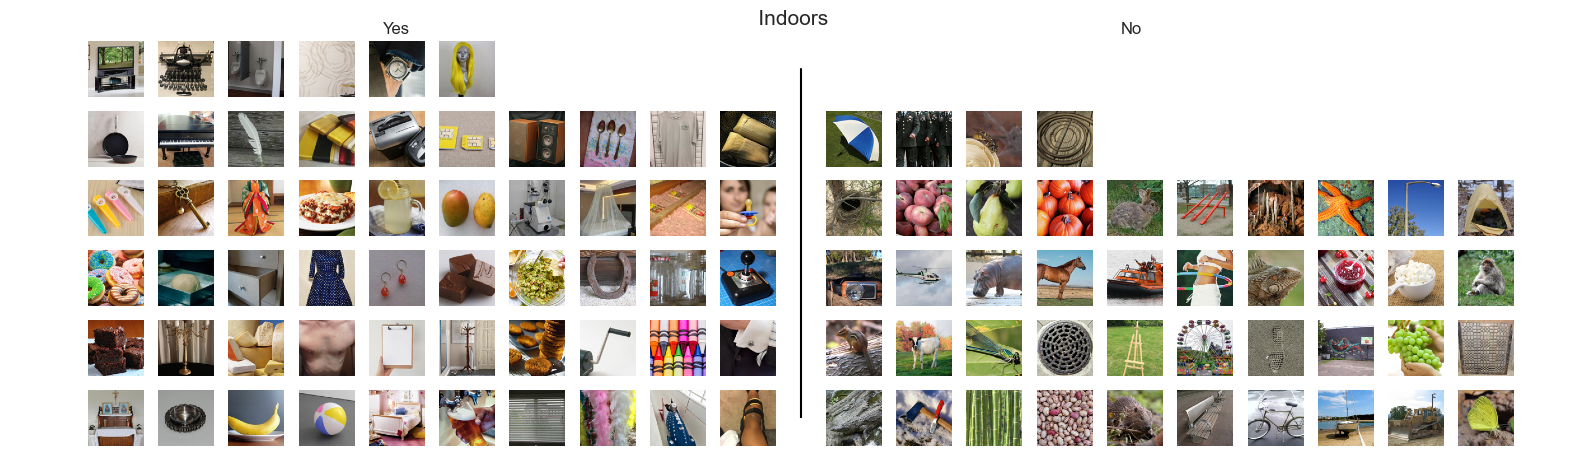

In [37]:
vis.get_images_along_distinction(mean_RDM_corr, 'Indoors')

## Model comparison

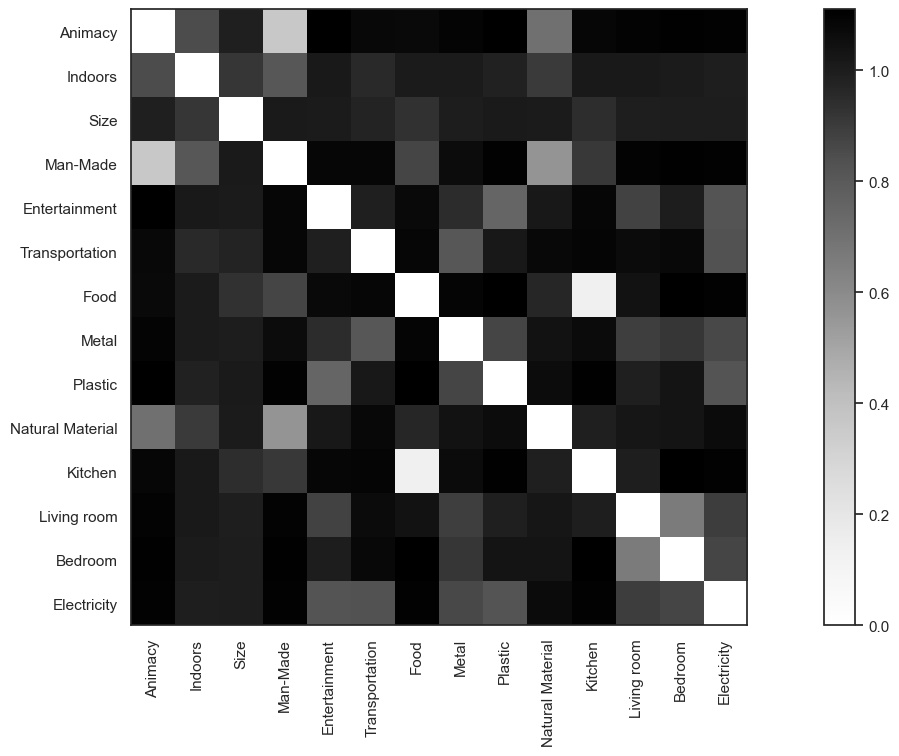

In [38]:
vis.plot_intermodel_distance_matrix(models, mean_RDM_corr, 'correlation', category_name_list)

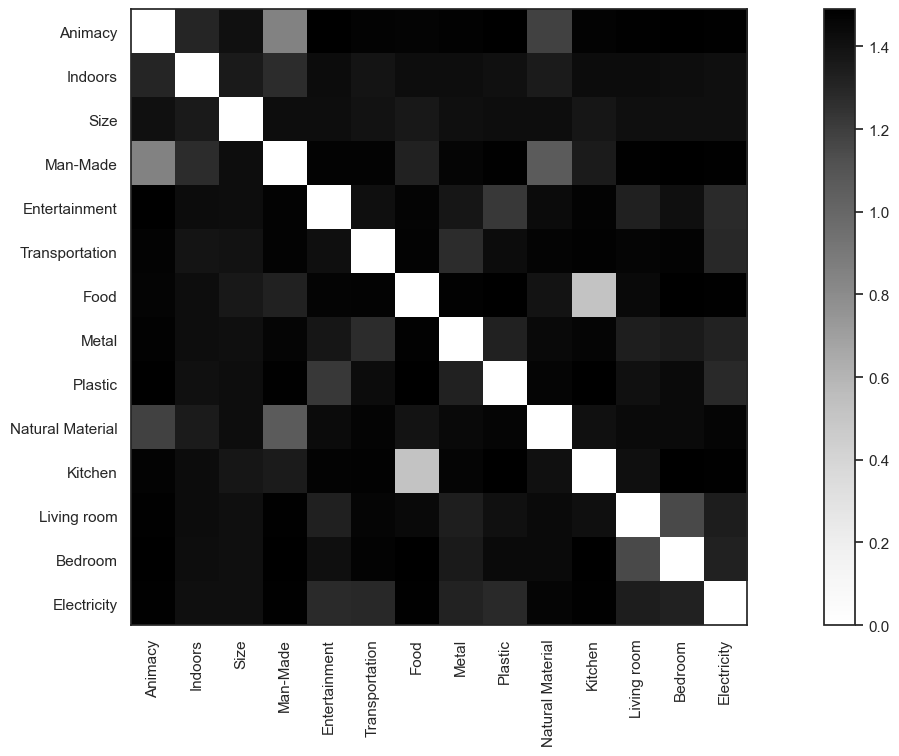

In [39]:
vis.plot_intermodel_distance_matrix(models, mean_RDM_corr, 'euclidean', category_name_list)